# Entropy Based Methods

## Entropy

One of the most fundamental ideas of 20th Century is [the information content](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a [communication channel](https://en.wikipedia.org/wiki/Communication_channel) defined by [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon). This idea also is the basis of the field called [Information Theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)).

Shannon's revolutionary idea is to measure (by giving a computable number) the information content of an arbitrary probability distribution.

Here is a concrete example: which one of the following sequences of 0's and 1's contain more information?

> 0,1,0,1,0,1,0,1,0,1,0,1
>
> 1,1,1,1,1,1,1,1,1,1,1,1

While the first sequence alternates between 0 and 1, the second sequence is constant 1. I would say **the second sequence contains less surprizes than the first**, or equivalently, **the first sequence contains more information than the second**. Shannon postulated that for an event $x$ with probability $p(x)$, the unexpectedness $I(x)$ of $x$ is happening is measured by $I(x) = \log(1/p(x)) = - \log(p(x))$ (the less likely it occurs the more surprizing it is). If this was the only requirement $I(x) = 1/p(x)$ would have been enough, but we also want that if $x$ and $y$ are independent events then the total information (surprize, unexpectedness) $I(x,y)$ of $x$ and $y$ happening together should be the sum $I(x)+I(y)$. That's why we take the log. For reasons I am going to explain later, we prefer the log with base 2.

The formal way of measuring how random one sequence is done via the concept of entropy: if $X$ is a random variable defined by a probability distribution $p(X)$ then the amount of information contained in $X$ is measured by the integral:

$$ H(X) = E(-\log_2 p(X)) = \int - \log_2(p(X)) p(X) dX $$

In case $X$ is discrete:

$$ H(X) = \sum_{i=1}^N -\log_2(p(X_i)) p(X_i) $$

So, let us calculate the information content of the sequences above: for the first sequence $p(0)=p(1)=0.5$, so

$$ I(p) = -0.5 \log_2(0.5)-0.5\log_2(0.5) = 1 $$

For the second sequence $p(0)=0$ and $p(1)=1$. Then

$$ I(p) = 0 - 1 \log(1) = 0 $$

The information content of the first distribution is 1 bit while the second contain no information at all.


In [1]:
from collections import Counter
from math import log

def H(x):
    tmp = Counter(x)
    vs = tmp.values()
    N = len(x)
    return sum([-log(v,2)*v/N for v in vs])+log(N,2)

In [2]:
xs = [0,1,0,1,0,1,0,1,0,1,0,1]
ys = [1,1,1,1,1,1,1,1,1,1,1,1]

H(xs),H(ys)

(1.0000000000000004, 0.0)

Now, let us look at a different example:

In [4]:
import pandas as pd
import numpy as np

Data = pd.DataFrame({
       'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                   'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                   'overcast', 'rainy'],
       'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
                       'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
       'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
                    'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
       'Windy': ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                 'false', 'false', 'false', 'true', 'true', 'false', 'true'],
       'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 
                            'yes','yes','yes','no']})

Data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


What you see above is a dataframe filled with categorical variables. Our response (dependent) variable is 'Play'. Let us look at the total information content of each column:

In [7]:
[{x: np.round(H(Data[x]),1)} for x in Data.columns]

[{'Outlook': 1.6},
 {'Temperature': 1.6},
 {'Humidity': 1.0},
 {'Windy': 1.0},
 {'Play': 0.9}]

Our aim is analyze the columns. We would like to find out the columns and values for which the response variable has the least variability, i.e. smallest entropy.

In [11]:
def splitByValue(xs,ys):
    zs = np.unique(xs)
    tmp = {z: ys[xs==z] for z in zs}
    return {z: {'counts': dict(Counter(tmp[z])), 
                'entropy': H(tmp[z])} for z in zs}

In [12]:
splitByValue(Data['Outlook'],Data['Play'])

{'overcast': {'counts': {'yes': 4}, 'entropy': 0.0},
 'rainy': {'counts': {'yes': 3, 'no': 2}, 'entropy': 0.9709505944546684},
 'sunny': {'counts': {'no': 3, 'yes': 2}, 'entropy': 0.9709505944546684}}

In [13]:
splitByValue(Data['Temperature'],Data['Play'])

{'cool': {'counts': {'yes': 3, 'no': 1}, 'entropy': 0.8112781244591327},
 'hot': {'counts': {'no': 2, 'yes': 2}, 'entropy': 1.0},
 'mild': {'counts': {'yes': 4, 'no': 2}, 'entropy': 0.9182958340544896}}

In [14]:
splitByValue(Data['Humidity'],Data['Play'])

{'high': {'counts': {'no': 4, 'yes': 3}, 'entropy': 0.9852281360342516},
 'normal': {'counts': {'yes': 6, 'no': 1}, 'entropy': 0.5916727785823275}}

In [15]:
splitByValue(Data['Windy'],Data['Play'])

{'false': {'counts': {'no': 2, 'yes': 6}, 'entropy': 0.8112781244591329},
 'true': {'counts': {'no': 3, 'yes': 3}, 'entropy': 0.9999999999999998}}

## Decision Trees

[Decision Tree](https://en.wikipedia.org/wiki/Decision_tree) algorithm belongs to the class of Supervised Learning algorithm. Thus it applies to a finite collection of data points $(x_i,y_i)\in D$ where $x_i$'s are independent variables and $y_i$'s are dependent (or response) variables. The main idea behind Decision Tree models is to create a partition $D_1,\ldots,D_m$ of $D$ such that on each $D_j$ the response variable $y_i$'s are **almost constant** or **almost uniform**.  

$$argmin_{P} \sum_{i\in P} H(D_i)$$

If we look at the partitions above, we see that the most promising feature is `Outlook` and the most promising value is `overcast`

In [30]:
uniform = Data[Data['Outlook']=='overcast']
rest = Data[Data['Outlook']!='overcast']
uniform

,Outlook,Temperature,Humidity,Windy,Play
2,overcast,hot,high,false,yes
6,overcast,cool,normal,true,yes
11,overcast,mild,high,true,yes
12,overcast,hot,normal,false,yes


In [31]:
rest

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes
10,sunny,mild,normal,true,yes
13,rainy,mild,high,true,no


In [32]:
splitByValue(rest['Outlook'],rest['Play'])

{'rainy': {'counts': {'yes': 3, 'no': 2}, 'entropy': 0.9709505944546684},
 'sunny': {'counts': {'no': 3, 'yes': 2}, 'entropy': 0.9709505944546684}}

In [33]:
splitByValue(rest['Temperature'],rest['Play'])

{'cool': {'counts': {'yes': 2, 'no': 1}, 'entropy': 0.9182958340544897},
 'hot': {'counts': {'no': 2}, 'entropy': 0.0},
 'mild': {'counts': {'yes': 3, 'no': 2}, 'entropy': 0.9709505944546684}}

In [34]:
splitByValue(rest['Humidity'],rest['Play'])

{'high': {'counts': {'no': 4, 'yes': 1}, 'entropy': 0.7219280948873621},
 'normal': {'counts': {'yes': 4, 'no': 1}, 'entropy': 0.7219280948873621}}

In [35]:
splitByValue(rest['Windy'],rest['Play'])

{'false': {'counts': {'no': 2, 'yes': 4}, 'entropy': 0.9182958340544896},
 'true': {'counts': {'no': 3, 'yes': 1}, 'entropy': 0.8112781244591327}}

The next promising feature is `Humidity` and the most promising value is `high`:

In [36]:
uniform2 = rest[rest['Humidity']=='high']
rest2 = rest[rest['Humidity']!='high']
uniform2

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
3,rainy,mild,high,false,yes
7,sunny,mild,high,false,no
13,rainy,mild,high,true,no


In [37]:
rest2

,Outlook,Temperature,Humidity,Windy,Play
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes
10,sunny,mild,normal,true,yes


So, here is out decision tree so far:

    if Outlook = overcast
       Play = Yes (prob = 1.0)
    else if Humidy = high 
       Play = No (prob = 0.8)
    else
       Play = Yes (prob = 0.8)
       
But, we don't have to do this by hand. Let us do it via `scikit-learn`

In [38]:
from sklearn.tree import DecisionTreeClassifier

indeps = ['Outlook','Temperature','Humidity','Windy']
classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')

xs = pd.get_dummies(Data[indeps])
ys = Data['Play']

classifier.fit(xs,ys)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.6, 0.8333333333333334, 'Outlook_overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(0.4, 0.5, 'Humidity_high <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = no'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = yes'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = no'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes')]

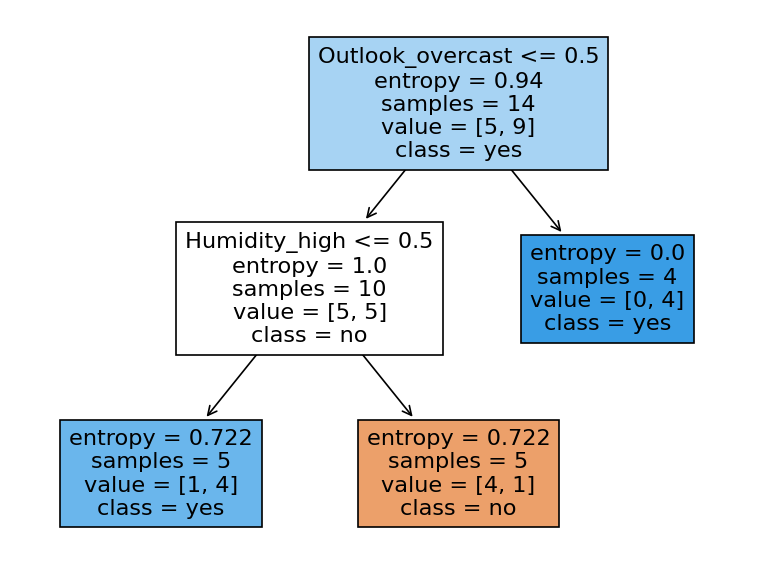

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(8, 6), dpi=120)
tree.plot_tree(classifier,
               feature_names=xs.columns,
               class_names=np.unique(Data['Play']),
               filled = True)

## Another Example

In [114]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

Data2 = load_breast_cancer()
pd.DataFrame(Data2['data'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [159]:
xs = Data2['data']
ys = Data2['target']

xtrain,xtest,ytrain,ytest = train_test_split(xs,ys)

model2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.9300699300699301

[Text(0.5769230769230769, 0.875, 'worst perimeter <= 114.45\nentropy = 0.957\nsamples = 426\nvalue = [161, 265]\nclass = benign'),
 Text(0.3076923076923077, 0.625, 'worst concave points <= 0.136\nentropy = 0.487\nsamples = 293\nvalue = [31, 262]\nclass = benign'),
 Text(0.15384615384615385, 0.375, 'area error <= 36.465\nentropy = 0.184\nsamples = 250\nvalue = [7, 243]\nclass = benign'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.04\nsamples = 233\nvalue = [1, 232]\nclass = benign'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]\nclass = benign'),
 Text(0.46153846153846156, 0.375, 'mean texture <= 20.3\nentropy = 0.99\nsamples = 43\nvalue = [24, 19]\nclass = malignant'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.906\nsamples = 28\nvalue = [9, 19]\nclass = benign'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = malignant'),
 Text(0.8461538461538461, 0.625, 'mean concave points <= 0.05\nentropy = 0.156\

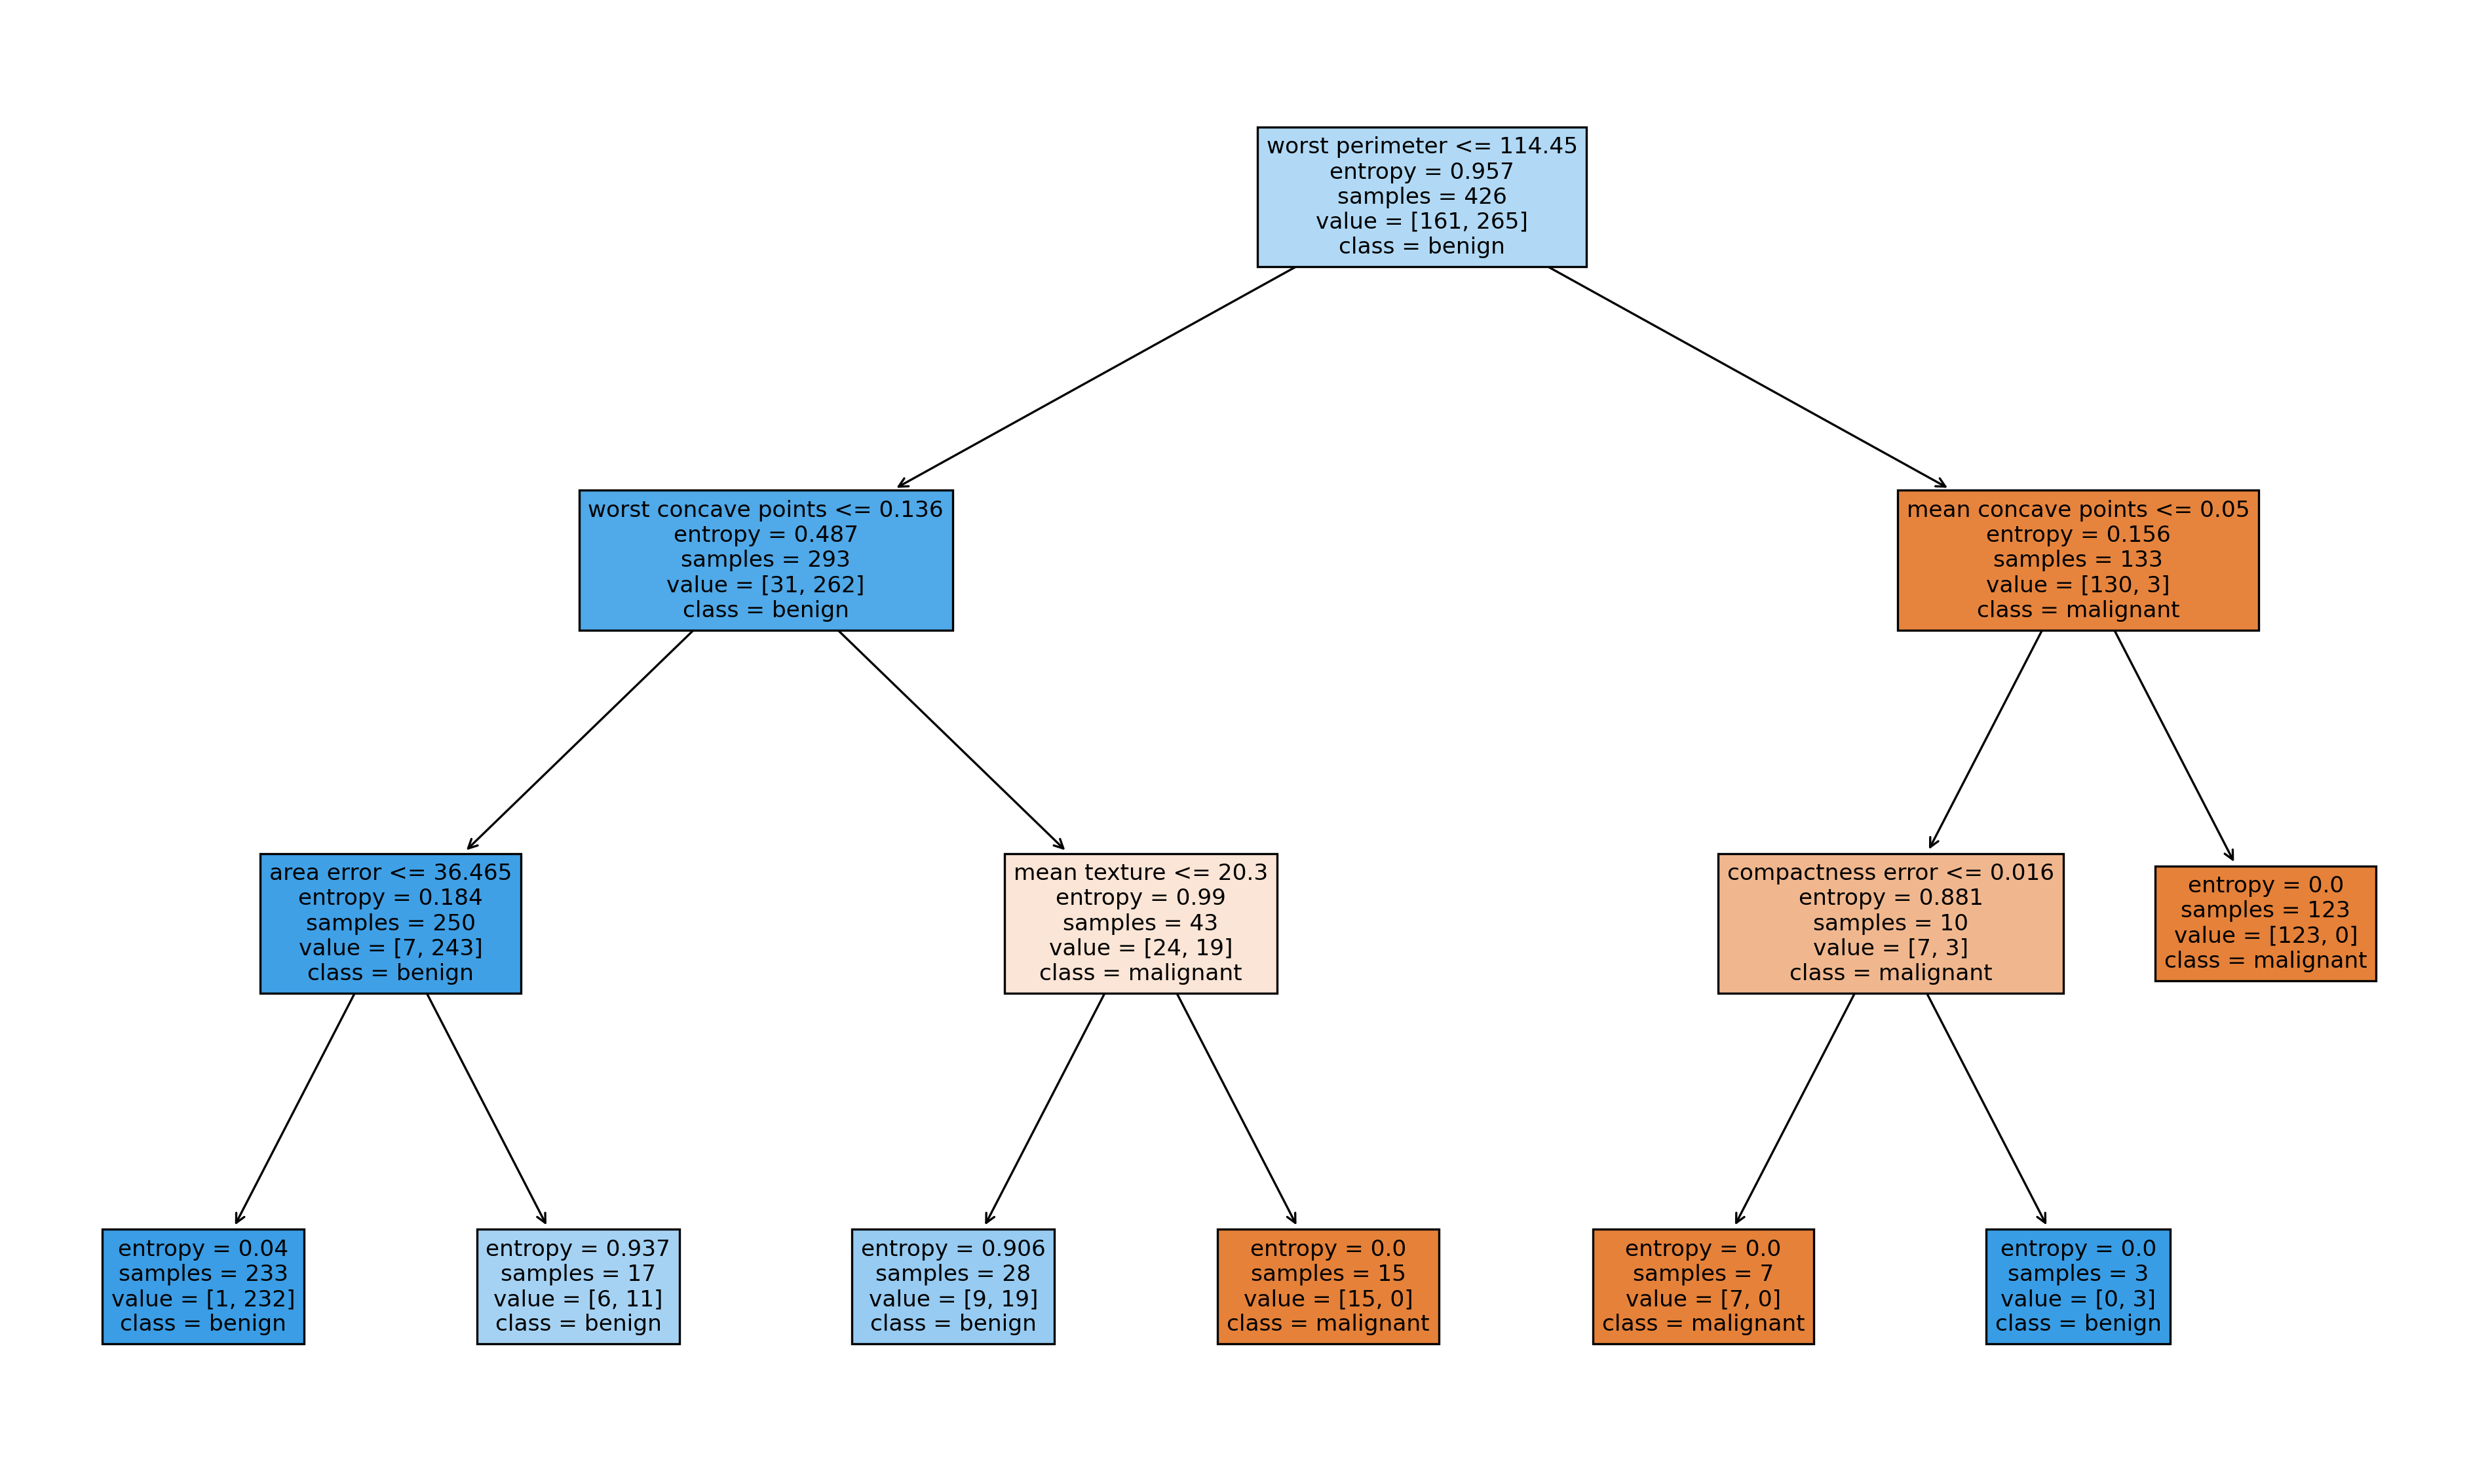

In [160]:
plt.figure(figsize=(20,12), dpi=240)
tree.plot_tree(model2,
               feature_names=Data2['feature_names'],
               class_names=Data2['target_names'],
               filled = True)

## Yet Another Example

In [55]:
Data3 = pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')
Data3

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [161]:
ys = Data3['Creditability']
xs = Data3.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(xs,ys,train_size=0.5)

model3 = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model3.fit(xs,ys)
model3.score(X_test,y_test)

0.748

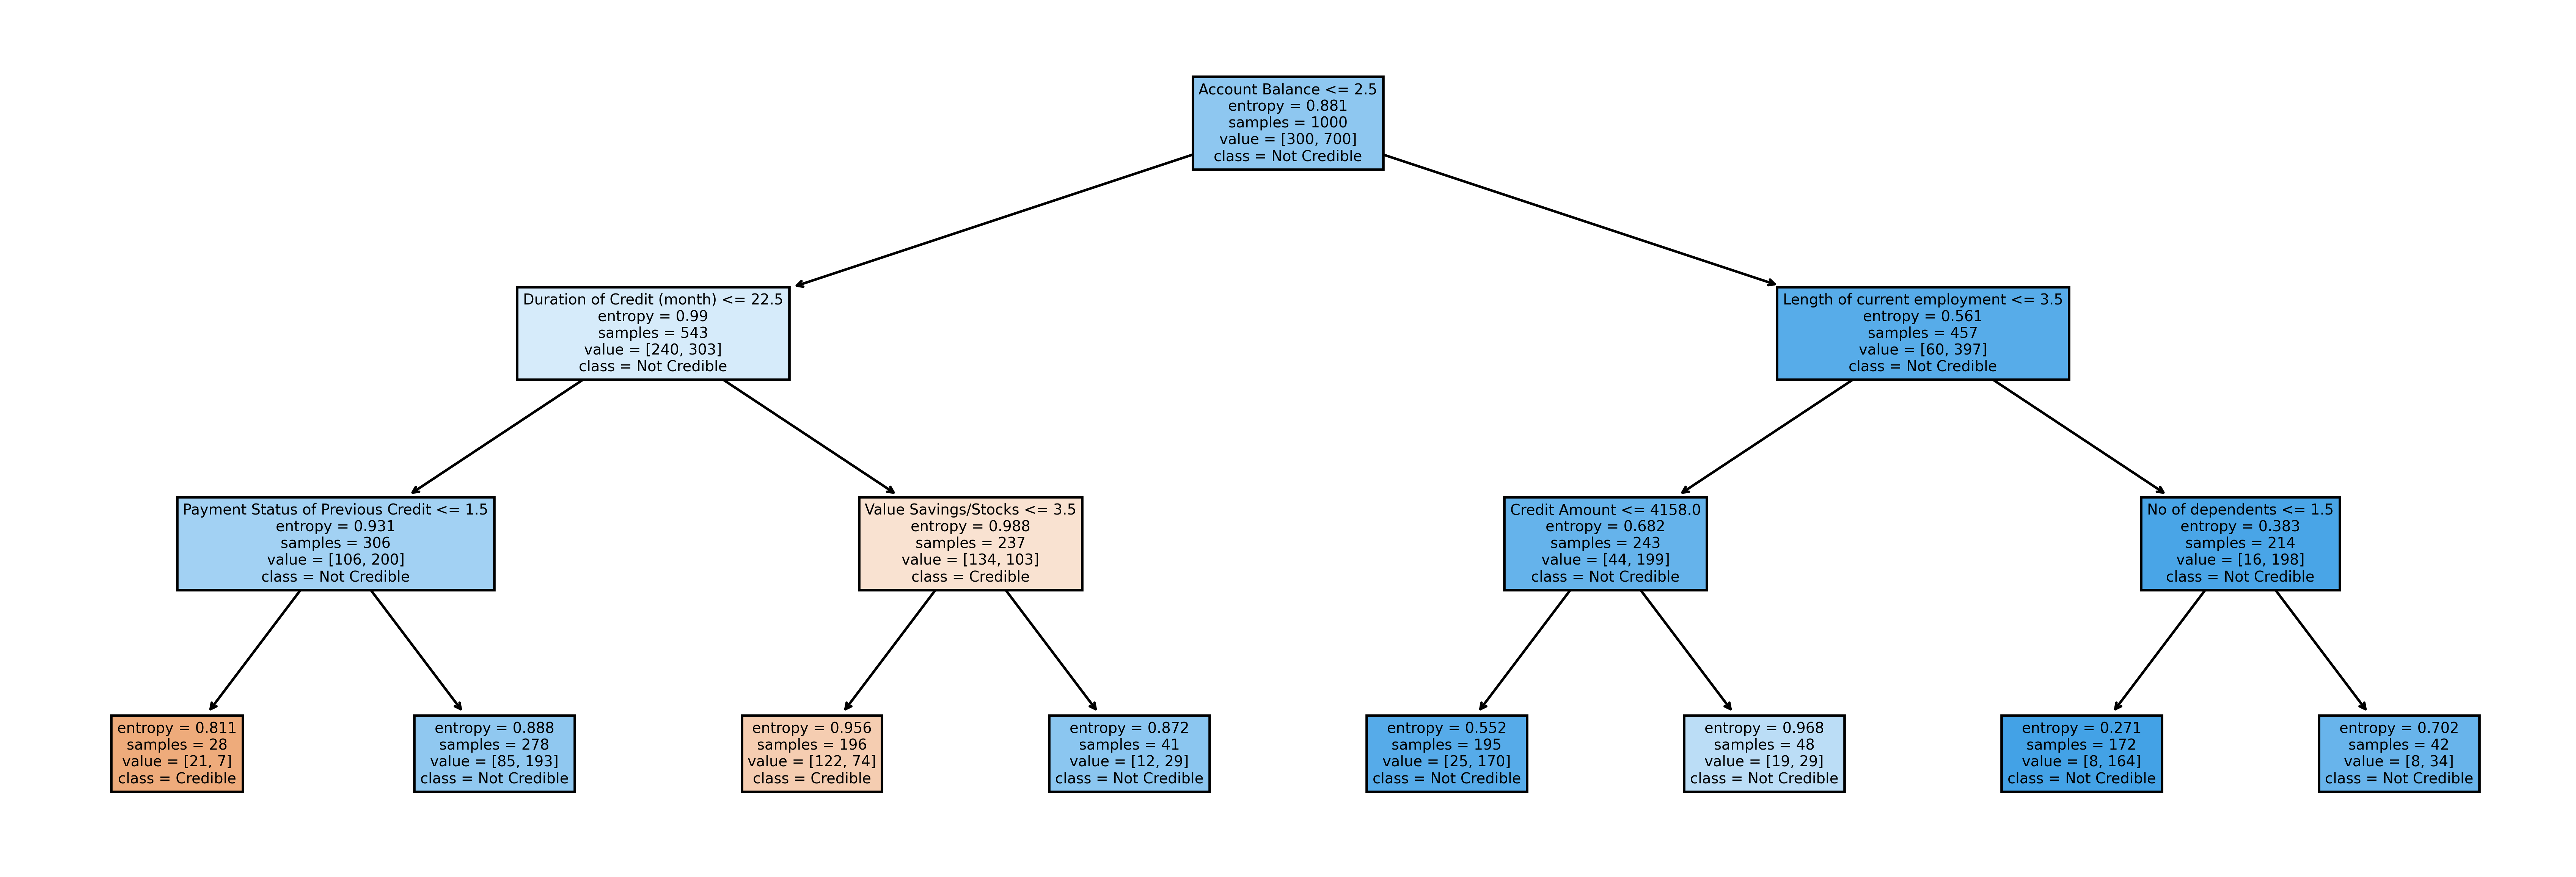

In [163]:
plt.figure(figsize=(18,6),dpi=480)
tree.plot_tree(model3,filled=True,feature_names=xs.columns,class_names=['Credible','Not Credible'])
plt.savefig('./images/lecture-10-image1.png')

## Ensemble models

Here is an interesting *paradox*:

> Sometimes a few weak models perform collectively better than one good model.

### Random forests

[Random forest](https://en.wikipedia.org/wiki/Random_forest) models use few random tree models together to get a better ensemble model.

In [129]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import t

In [145]:
def doExperiment(xs,ys,model,ts=0.2,N=5):
    res = []
    for i in range(N):
        xtrain,xtest,ytrain,ytest = train_test_split(xs,ys,test_size=ts)
        model.fit(xtrain,ytrain)
        res.append(model.score(xtest,ytest))
    experiments = np.array(res)
    return t.interval(0.95,N-1,loc=experiments.mean(),scale=experiments.var())

In [153]:
xs = Data2['data']
ys = Data2['target']

model = RandomForestClassifier()
doExperiment(xs,ys,model,10)

(0.9755576878316836, 0.9844423121683166)

### Gradient boosting

Read about [gradient boosting](http://www.stat.cmu.edu/~ryantibs/convexopt-F15/scribes/06-subgradients-scribed.pdf).

In [133]:
import xgboost as xgb

In [148]:
xs = Data3.iloc[:,1:]
ys = Data3.Creditability

model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='error')
doExperiment(xs, ys, model, 5)

(0.6044998836237715, 0.8355001163762285)

In [149]:
xs = Data2['data']
ys = Data2['target']

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')
doExperiment(xs,ys,model,5)

(0.8933461269901011, 0.9466538730098988)

In [152]:
from sklearn.datasets import load_iris

Data4 = load_iris()
xs = Data4['data']
ys = Data4['target']

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error')
doExperiment(xs,ys,model,5)

(0.9422307513267341, 0.9777692486732659)